In [22]:
import numpy as np
import pandas as pd


In [2]:
columns=pd.read_table("diabetes_data_upload.csv",delimiter=',')

In [3]:
columns.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
for col in columns.columns:
    if col!='Age' and col!='Gender' and col!='class':
        columns[col]=[1 if c=='Yes' else 0 for c in columns[col]]
    if col=='class':
        columns[col]=[1 if c=='Positive' else 0 for c in columns[col]]
    if col=='Gender':
        columns[col]=[1 if c=='Male' else 0 for c in columns[col]]


In [5]:
from sklearn import tree

In [6]:
dtr = tree.DecisionTreeRegressor(max_depth=10)

In [7]:
dtr.fit(columns.values[:,:15],columns.values[:,16])

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

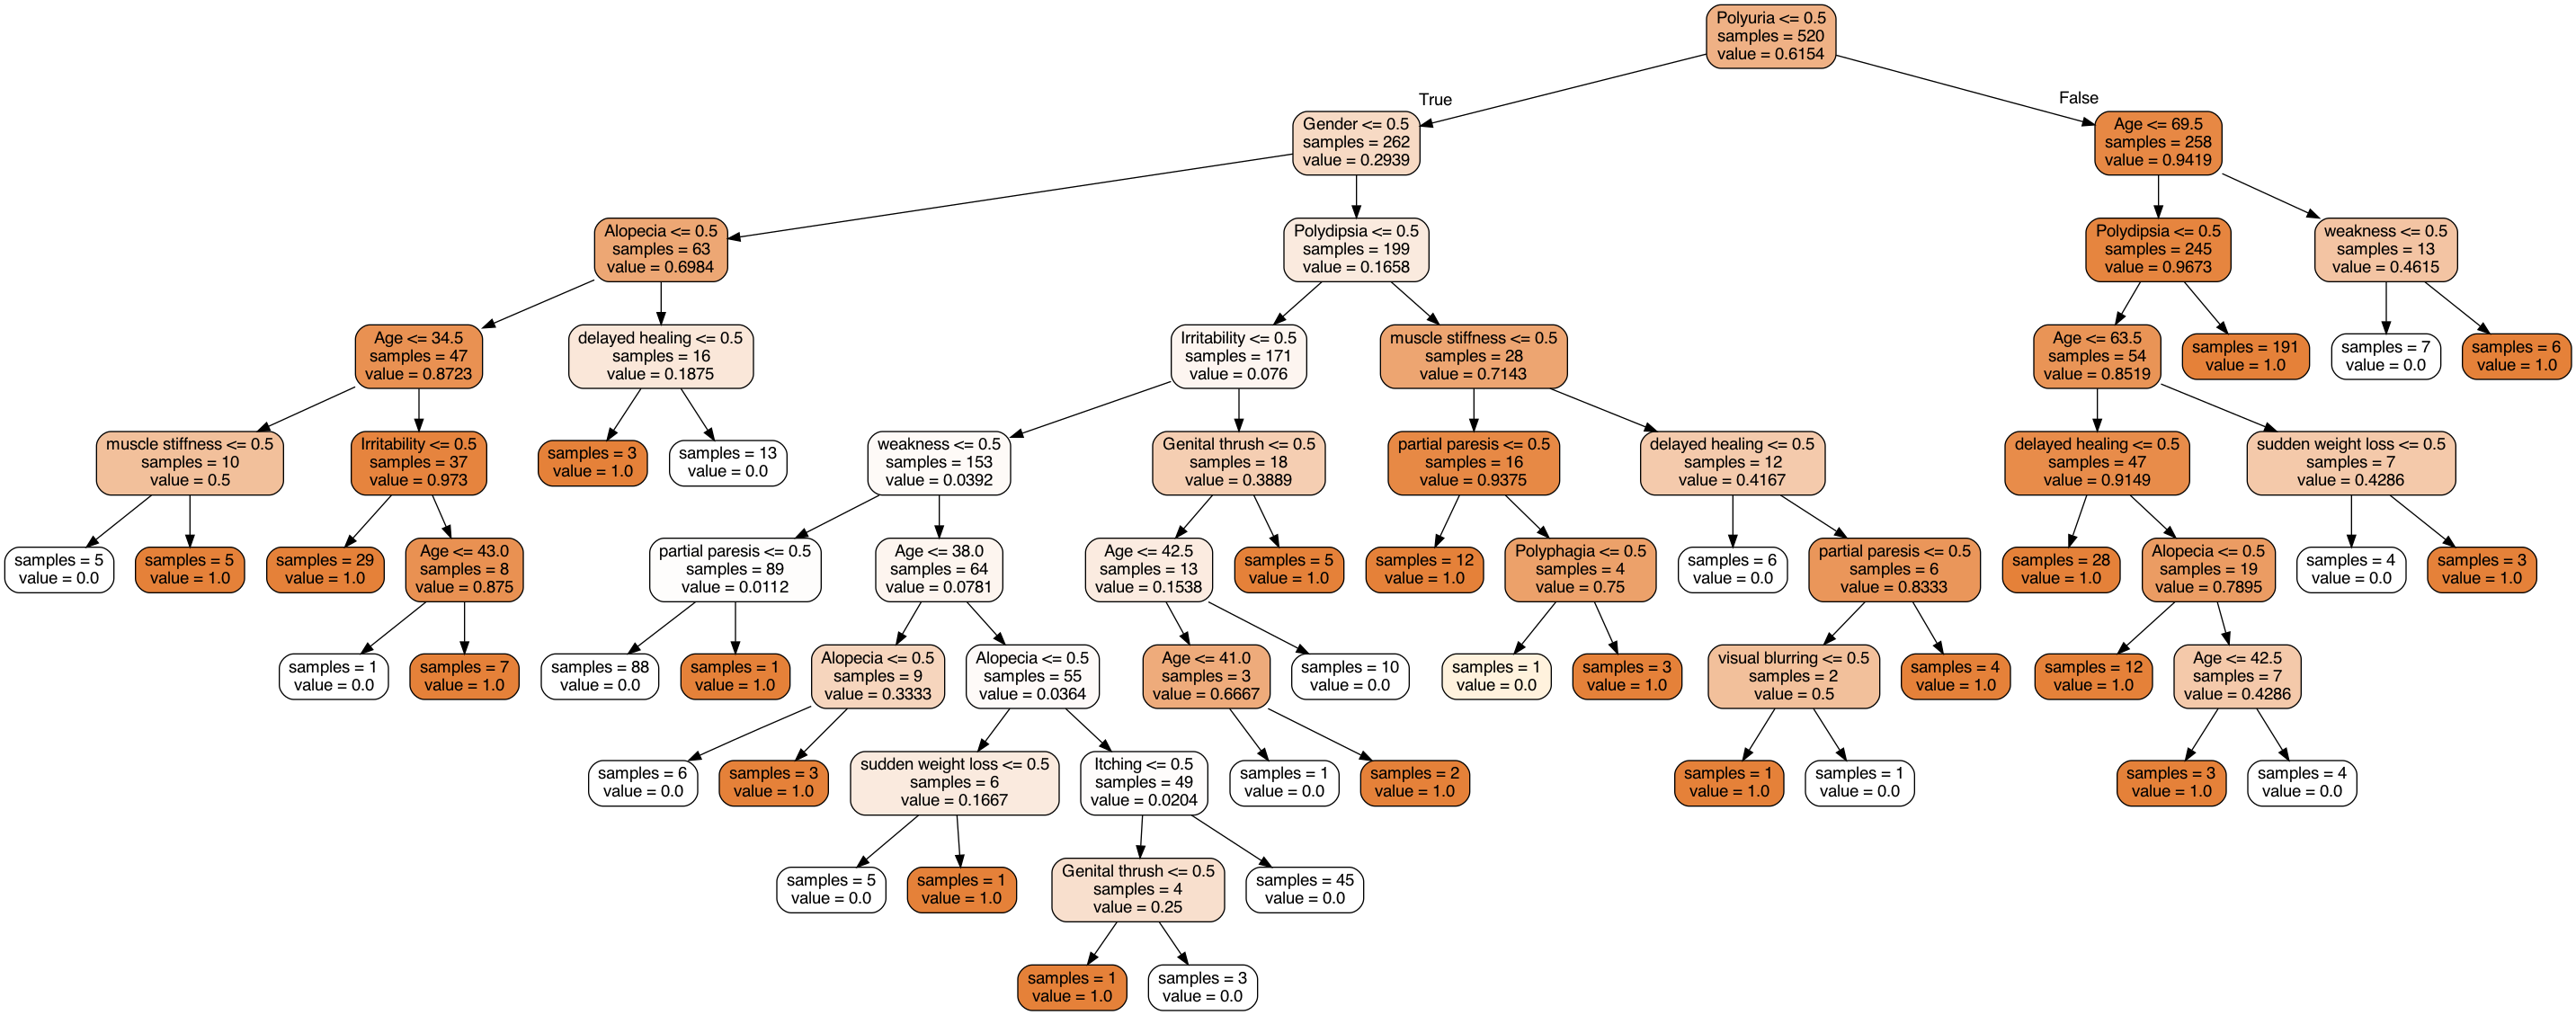

In [8]:

# dtr.fit(housing.data[:, [6, 7]], housing.target)
# dtr.fit()
dtr.fit(columns.values[:, :15], columns.values[:, 16])
dot_data = \
    tree.export_graphviz(
        dtr,
        out_file=None,
        feature_names=columns.columns,
        filled=True,
        impurity=False,
        rounded=True
    )
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor("#FFF2DD")
from IPython.display import Image
Image(graph.create_png()) 

In [9]:
from sklearn.model_selection import train_test_split
data_train,data_test,target_train,target_test= train_test_split(columns.values[:,:15],columns.values[:,16],test_size=0.1,random_state=43)
dtr=tree.DecisionTreeRegressor(max_depth=10)

In [13]:
dtr.fit(data_train,target_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [14]:
dtr.score(data_test,target_test)

0.9170653907496013

In [19]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=42)
rfr.fit(data_train,target_train)
rfr.score(data_test,target_test)

0.8789154704944178

进行参数的调整

In [21]:
from sklearn.grid_search import GridSearchCV
tree_param_grid={'min_samples_split':list((3,6,9)),'n_estimators':list((2,4,8,16,32))}
grid=GridSearchCV(RandomForestRegressor(),param_grid=tree_param_grid,cv=5)
grid.fit(data_train,target_train)
grid.grid_scores_,grid.best_params_,grid.best_score_

([mean: 0.79967, std: 0.11130, params: {'min_samples_split': 3, 'n_estimators': 2},
  mean: 0.77355, std: 0.11860, params: {'min_samples_split': 3, 'n_estimators': 4},
  mean: 0.83995, std: 0.08240, params: {'min_samples_split': 3, 'n_estimators': 8},
  mean: 0.85488, std: 0.10743, params: {'min_samples_split': 3, 'n_estimators': 16},
  mean: 0.86306, std: 0.08909, params: {'min_samples_split': 3, 'n_estimators': 32},
  mean: 0.75376, std: 0.09433, params: {'min_samples_split': 6, 'n_estimators': 2},
  mean: 0.77928, std: 0.13036, params: {'min_samples_split': 6, 'n_estimators': 4},
  mean: 0.82215, std: 0.08978, params: {'min_samples_split': 6, 'n_estimators': 8},
  mean: 0.82612, std: 0.09990, params: {'min_samples_split': 6, 'n_estimators': 16},
  mean: 0.84273, std: 0.08084, params: {'min_samples_split': 6, 'n_estimators': 32},
  mean: 0.77532, std: 0.10979, params: {'min_samples_split': 9, 'n_estimators': 2},
  mean: 0.79725, std: 0.06381, params: {'min_samples_split': 9, 'n_estim

In [ ]:
from sklearn.grid_search import GridSearchCV
tree_param_grid={'min_samples_split':list((3,6,9)),'n_estimators':list((2,4,8,16,32))}
grid=GridSearchCV(RandomForestRegressor(),param_grid=tree_param_grid,cv=5)
grid.fit(data_train,target_train)
grid.grid_scores_,grid.best_params_,grid.best_score_